<module 'matplotlib.pyplot' from '/Users/fatinqistinamohdfaizal/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/matplotlib/pyplot.py'>

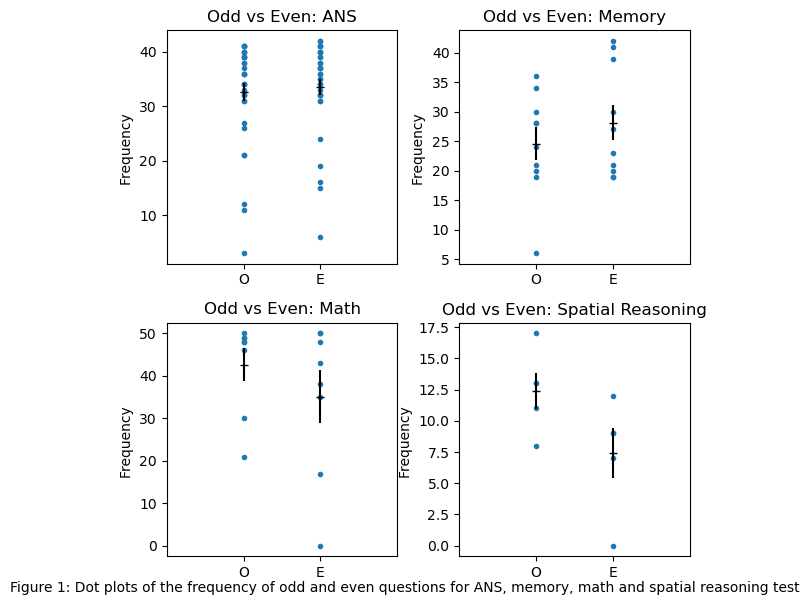

In [104]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from IPython.display import display, HTML



q_odd_ANS = np.array([12,40,38,40,26,27,38,41,31,39,31,39,36,37,34,39,41,41,39,32,11,32,36,33,41,21,34,34,3,40,36,21])
q_even_ANS = np.array([24,38,39,15,34,32,19,41,35,36,39,35,37,31,37,32,33,31,41,40,34,42,37,40,40,16,42,38,6,41,32,36])

q_odd_memory = np.array([28,30,36,34,24,28,21,20,6,19])
q_even_memory = np.array([30,19,42,39,21,23,41,27,20,19])

q_odd_math = np.array([50,49,48,46,48,49,30,21])
q_even_math = np.array([50,50,48,43,35,38,17,0])

q_odd_spatial = np.array([8,17,13,11,13])
q_even_spatial = np.array([9,7,12,9,0])


def create_subplot(ax, q_odd, q_even, title):
    number = np.concatenate((q_odd, q_even))
    type = ["O"] * len(q_odd) + ["E"] * len(q_even)
    df = pd.DataFrame({"frequency": number, "question": type})
    
    o_df = df.query("question=='O'")
    e_df = df.query("question=='E'")
    
    o_mean = o_df['frequency'].mean()
    o_std_err = stats.sem(o_df['frequency'])
    e_mean = e_df['frequency'].mean()
    e_std_err = stats.sem(e_df['frequency'])
    
    ax.plot(df['question'], df['frequency'], '.')
    ax.set_xlim(-1, 2)
    ax.set_ylabel("Frequency ")
    ax.errorbar('O', o_mean, yerr=o_std_err, marker='_', color='black')
    ax.errorbar('E', e_mean, yerr=e_std_err, marker='_', color='black')
    ax.set_title(title)


fig, axs = plt.subplots(2, 2, figsize=(6, 6))


create_subplot(axs[0,0], q_odd_ANS, q_even_ANS, "Odd vs Even: ANS")
create_subplot(axs[0,1], q_odd_memory, q_even_memory, "Odd vs Even: Memory")
create_subplot(axs [1,0], q_odd_math, q_even_math, "Odd vs Even: Math")
create_subplot(axs [1,1], q_odd_spatial, q_even_spatial, "Odd vs Even: Spatial Reasoning")

fig.text(0.5, 0, "Figure 1: Dot plots of the frequency of odd and even questions for ANS, memory, math and spatial reasoning test", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
display(plt)





In [100]:
def analysis(q_odd, q_even, test):
    mean_odd = q_odd.mean()
    mean_even = q_even.mean()
    diff = mean_odd - mean_even
    result = stats.ttest_ind(q_odd, q_even, equal_var=False)
    p_value = result.pvalue
    
    data = {
        'Test': test,
        'Mean of Odd Questions': mean_odd,
        'Mean of Even Questions': mean_even,
        'Difference of Odd and Even': diff,
        'P-Value(0.05)': p_value
    }
    
    return pd.DataFrame([data])
    

accumulated_results = pd.DataFrame()


datasets = [
    (q_odd_ANS, q_even_ANS, 'ANS'),
    (q_odd_memory, q_even_memory, 'Memory'),
    (q_odd_math, q_even_math, 'Math'),
    (q_odd_spatial, q_even_spatial, 'Spatial Reasoning')
    
   
]

for q_odd, q_even, test in datasets:
    new_result = analysis(q_odd, q_even, test)
    accumulated_results = pd.concat([accumulated_results, new_result], ignore_index=True)

display(accumulated_results)
display(HTML('<b>Table 1:</b> Summary table of t-test of difference between odd and even questions on each test.'))

,Test,Mean of Odd Questions,Mean of Even Questions,Difference of Odd and Even,P-Value(0.05)
0,ANS,32.59375,33.53125,-0.9375,0.682628
1,Memory,24.60000,28.10000,-3.5000,0.398452
2,Math,42.62500,35.12500,7.5000,0.332013
3,Spatial Reasoning,12.40000,7.40000,5.0000,0.083245


Performance of individuals on the odd vs even questions were used to examine the reliability of tests to measure individual
ability. In each test, frequency of each correct odd and even questions are taken.  By applying a t-test with a significance 
level of 95%, we found that the p-value for the difference of odd and even questions are more than 0.05 for all 4 tests.
There is no significant difference. This shows that the tests are reliable in measuring individual's abilities. 